In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define constants
a = 0.2
L = 1.0
N = 201
dx = L / (N - 1)
dt = dx / (2 * np.abs(a))  # Adjusted time step for stability
x = np.linspace(0, L, N)
T = 2.5


In [3]:
# Define initial condition
def u0(x):
    return np.sin(2 * np.pi * x)

# Implement Leapfrog discretization scheme
def leapfrog_update(u_previous, u_current, a, dt, dx):
    u_next = np.zeros_like(u_current)
    alpha = a * dt / dx

    # Update interior points
    for i in range(1, N - 1):
        u_next[i] = u_previous[i] - alpha * (u_current[i + 1] - u_current[i - 1])

    # Apply periodic boundary conditions
    u_next[0] = u_previous[0] - alpha * (u_current[1] - u_current[-2])
    u_next[-1] = u_next[0]

    return u_next


Wave energy (initial): 1.2275e-06
Wave energy (final): 1.2293e-06
Wave Energy Percentage Change 0.15 %


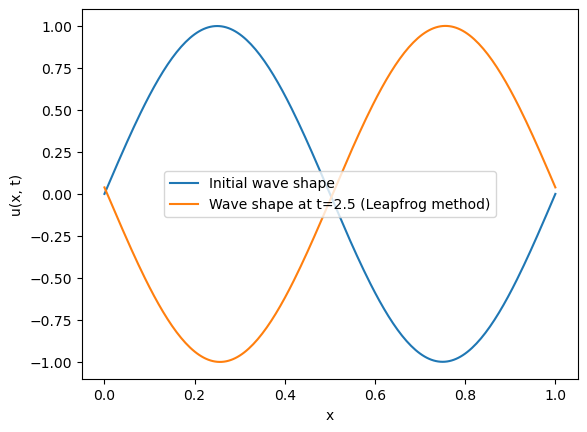

In [4]:
# Solve the wave equation using Leapfrog method
u_previous = u0(x - 0.5 * dt * a)  # Initial condition at n-1/2
u_current = u0(x)  # Initial condition at n
for t in np.arange(0, T, dt):
    u_next = leapfrog_update(u_previous, u_current, a, dt, dx)
    u_previous, u_current = u_current, u_next

# Calculate wave energy
def wave_energy(u, dx):
    return np.sum(0.5 * (u[1:] - u[:-1])**2) * dx

E_initial = wave_energy(u0(x), dx) / N
E_final = wave_energy(u_current, dx) / N

print("Wave energy (initial):", round(E_initial, 10))
print("Wave energy (final):", round(E_final, 10))
print("Wave Energy Percentage Change", round(((E_final - E_initial) / E_initial * 100), 2), "%")

# Plot the solution
plt.plot(x, u0(x), label="Initial wave shape")
plt.plot(x, u_current, label="Wave shape at t=2.5 (Leapfrog method)")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.legend()
plt.show()
